Selected features: ['concave points_worst', 'radius_worst', 'radius_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst']
Num features: 6


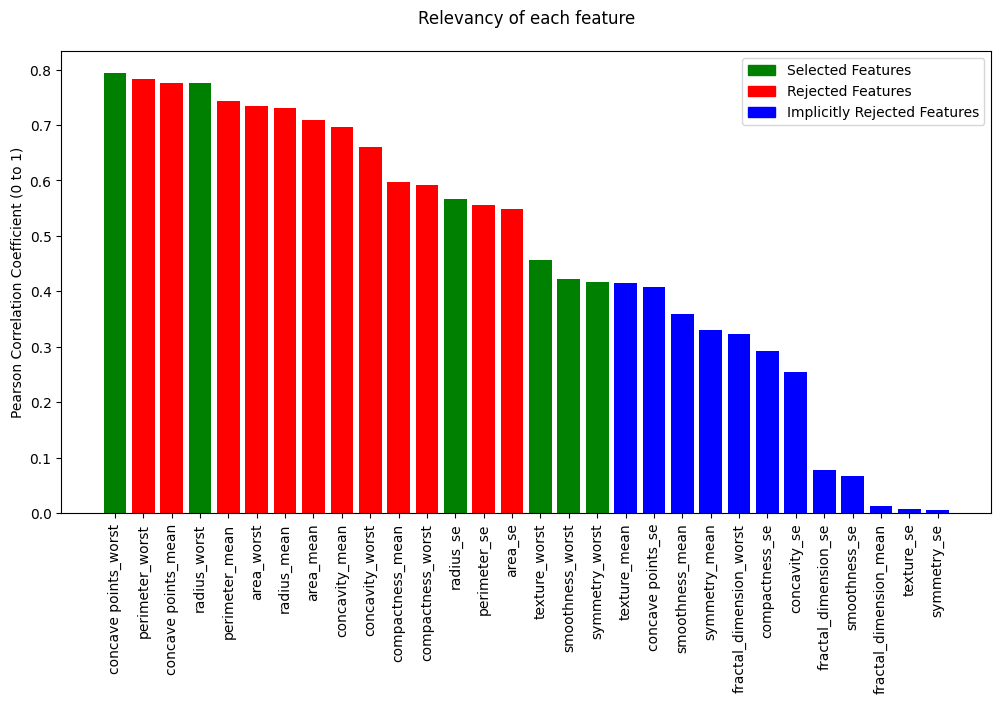

Selected features: ['concave points_worst', 'radius_worst', 'radius_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst']
Num features: 6


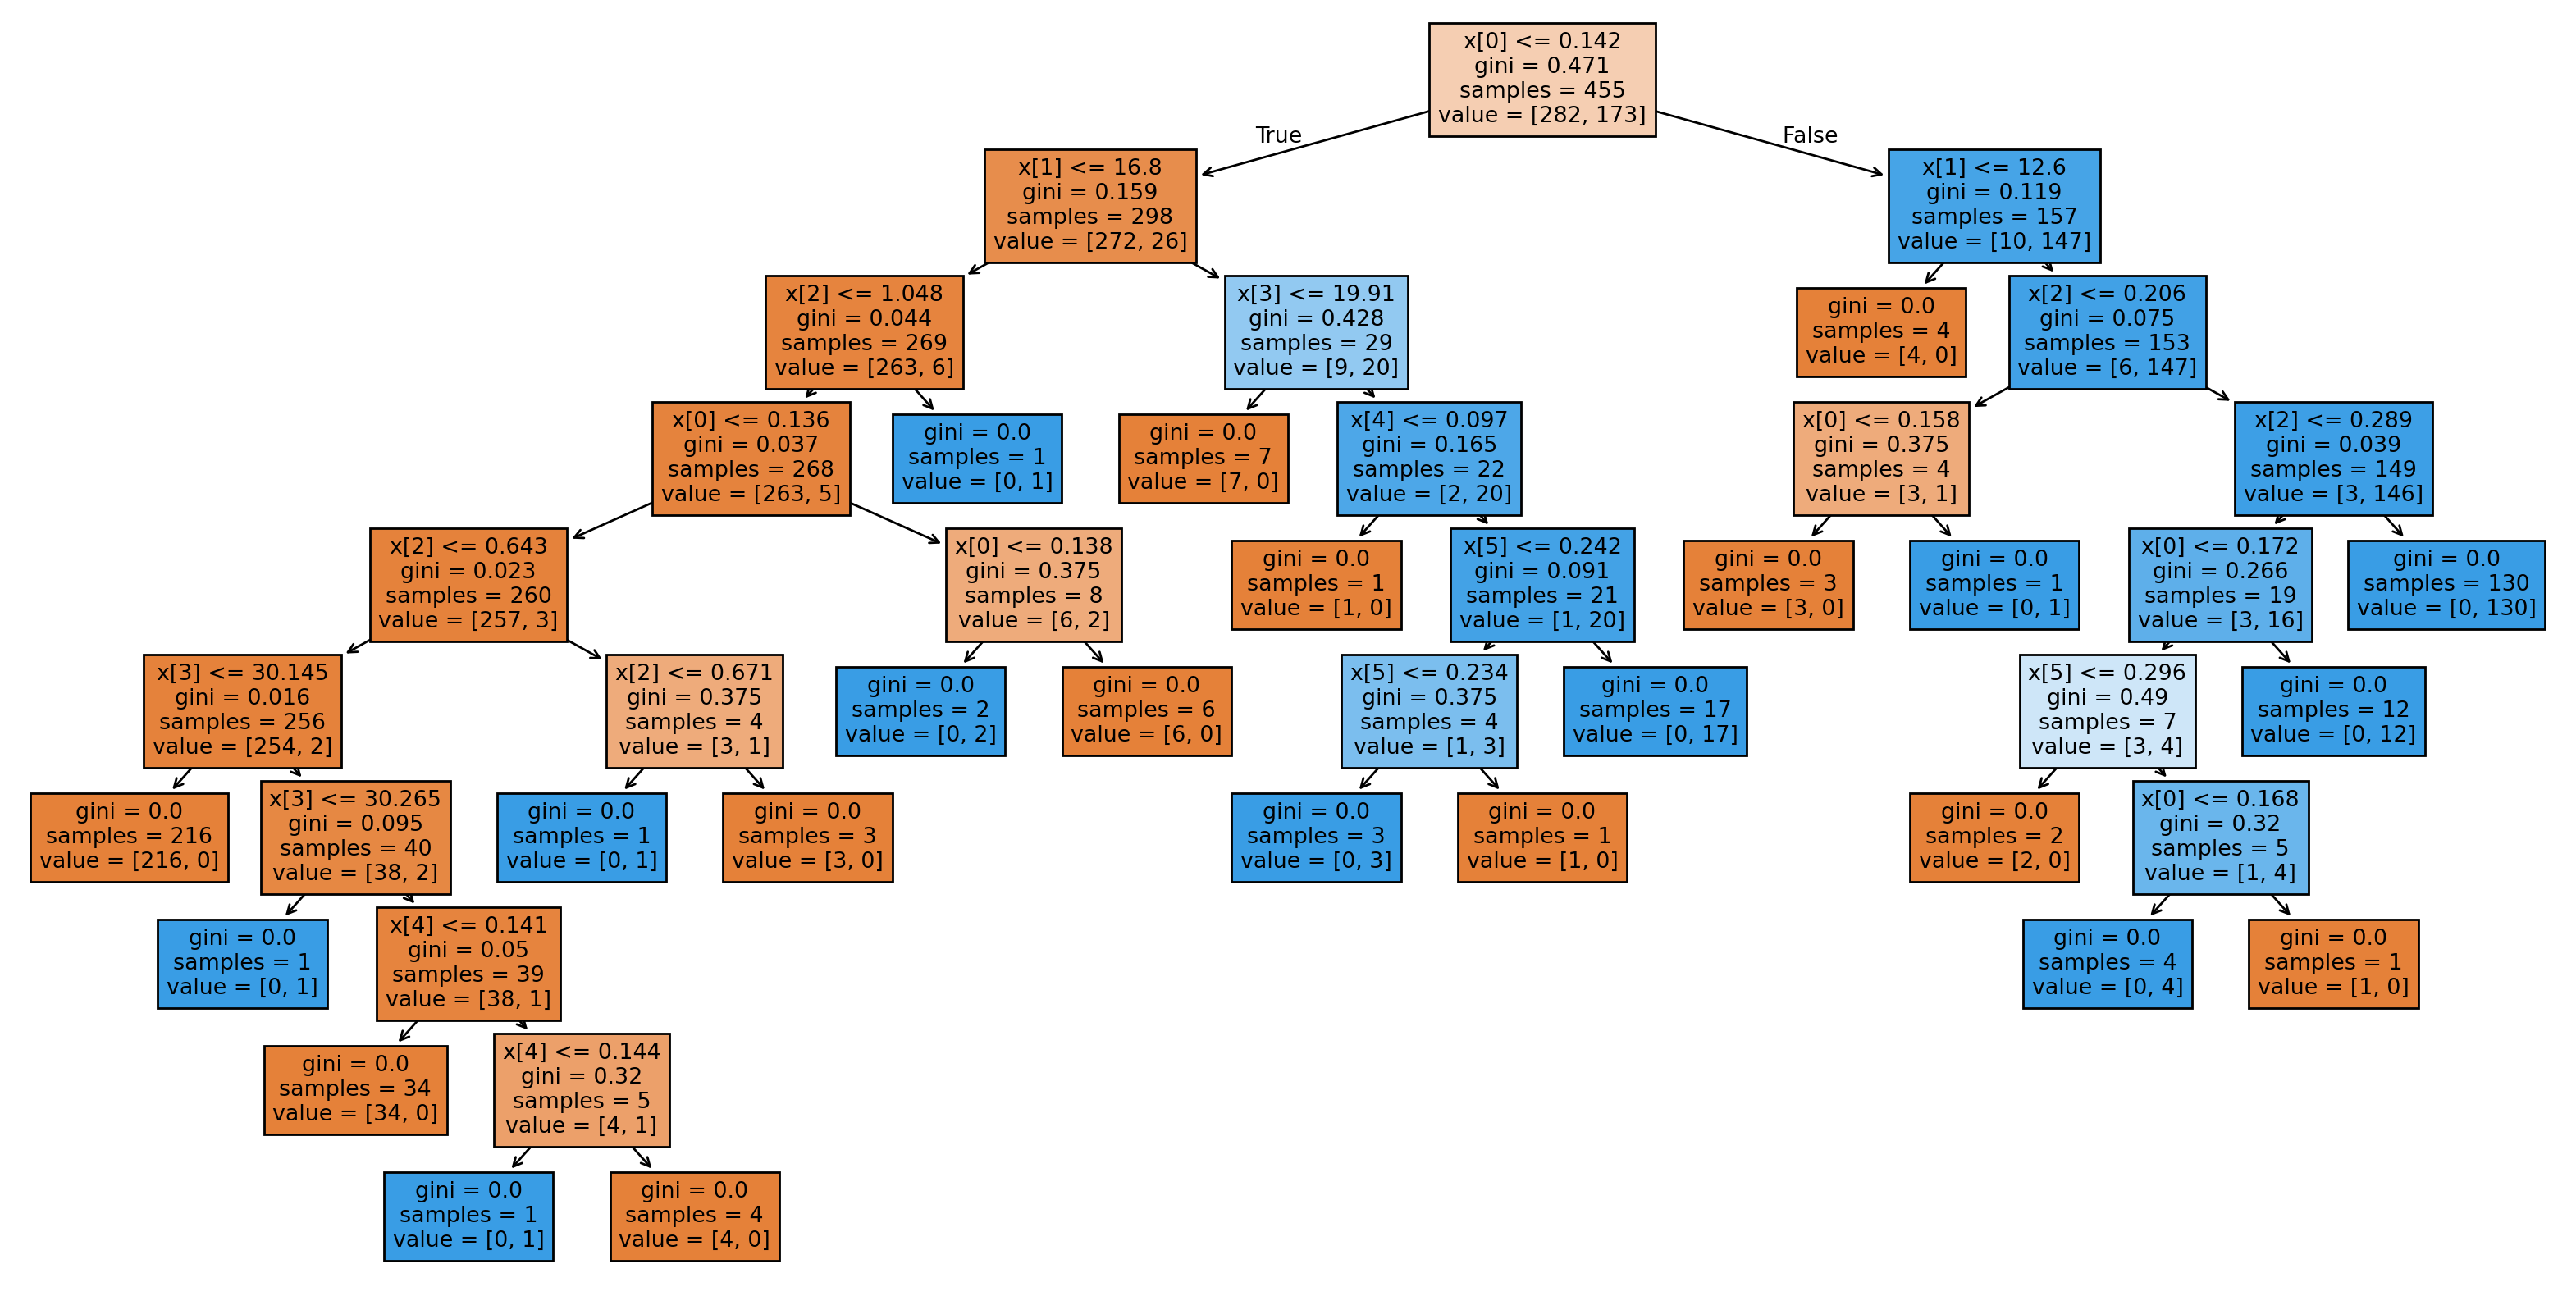

In [1]:
# 03/02/2025
# CONTROLLER
###################

from ipynb.fs.full.MLmodels import runModels
from ipynb.fs.full.preprocessing import dataPreProcessing


def controller(inFile = "data", inputDF = None, procs = ["clean", "predMap", "CFS", "splitSet"], k = 10, tauRed = 0.8, inTestSize = 0.2, run = True):
  returnData = {}
  vars = dataPreProcessing(
      dsFile = inFile, df = inputDF, processes = procs, kFeatures = k, tauRedundancy = tauRed, testSize = inTestSize
  );
  df = vars["df"]

  if run and "splitSet" in procs:
    [Ypreds, models] = runModels(vars["Xtrain"], vars["Ytrain"], vars["Xtest"], modes = ["train", "test"])
    vars["Ypreds"] = Ypreds
    vars["models"] = models
  return vars

vars = controller("data", inputDF = None, procs = ["clean", "predMap", "CFS", "splitSet"], k = 6, tauRed = 0.8, inTestSize = 0.2, run = True);
Xtrain = vars["Xtrain"]
Ytrain = vars["Ytrain"]
Xtest = vars["Xtest"]
Ytest = vars["Ytest"]

In [2]:
##################################

# EVALUATE MODELS

##################################

In [3]:
# 12/2024
# NORMAL PERFORMANCE METRICS
from ipynb.fs.full.performance import performanceEval

# logistic reg
print("============= LOGISTIC REGRESSION MODEL PERFORMANCE =============")
regMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_regModel"], "Logistic Regression model")
print(regMetrics)
print("=================================================================")

# svm (linear kernel)
print("============= SVM (LINEAR KERNEL) MODEL PERFORMANCE =============")
svmLinMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_svmModel"], "SVM (Linear Kernel) model")
print(svmLinMetrics)
print("=================================================================")

# NBC
print("============= NAIVE BAYES CLASSIFIER MODEL PERFORMANCE =============")
nbcMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_nbcModel"], "NBC model")
print(nbcMetrics)
print("=================================================================")

# K-NN
print("============= K-NN MODEL MODEL PERFORMANCE =============")
knnMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_knnModel"], "K-NN model")
print(knnMetrics)
print("=================================================================")

# Decision Tree
print("============= DECISION TREE MODEL PERFORMANCE =============")
decTreeMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_dtModel"], "K-NN model")
print(decTreeMetrics)
print("=================================================================")

============= LOGISTIC REGRESSION MODEL PERFORMANCE =============
Logistic Regression model  accuracy (in %): 98.24561403508771
Predicted   0   1  All
Actual                
0          74   1   75
1           1  38   39
All        75  39  114
{'accuracy': 98.24561403508771, 'specificity': 98.66666666666667, 'sensitivity': 97.43589743589743, 'recall': 97.43589743589743, 'precision': 97.43589743589743}
============= SVM (LINEAR KERNEL) MODEL PERFORMANCE =============
SVM (Linear Kernel) model  accuracy (in %): 98.24561403508771
Predicted   0   1  All
Actual                
0          75   0   75
1           2  37   39
All        77  37  114
{'accuracy': 98.24561403508771, 'specificity': 100.0, 'sensitivity': 94.87179487179486, 'recall': 94.87179487179486, 'precision': 100.0}
============= NAIVE BAYES CLASSIFIER MODEL PERFORMANCE =============
NBC model  accuracy (in %): 96.49122807017544
Predicted   0   1  All
Actual                
0          75   0   75
1           4  35   39
All      

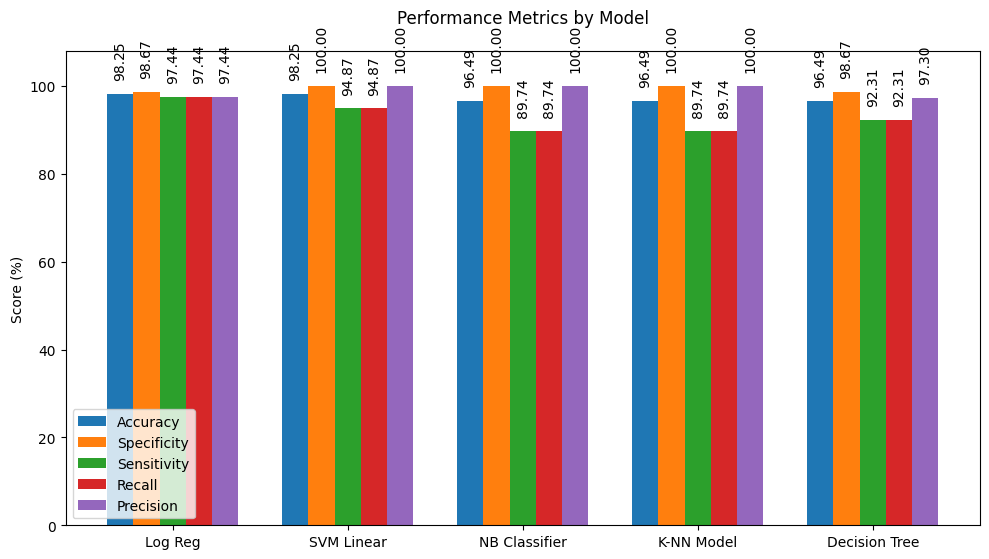

In [4]:
# 03/02/2025
import numpy as np
import matplotlib.pyplot as plt

# Bar Chart of Perf Metrics
modelNames = ["Log Reg", "SVM Linear", "NB Classifier", "K-NN Model", "Decision Tree"]
modelMetrics = [regMetrics, svmLinMetrics, nbcMetrics, knnMetrics, decTreeMetrics]
acc, spec, sen, rec, prec = [], [], [], [], []

# Extract metrics for each model
for metrics in modelMetrics:
    acc.append(metrics["accuracy"])
    spec.append(metrics["specificity"])
    sen.append(metrics["sensitivity"])
    rec.append(metrics["recall"])
    prec.append(metrics["precision"])

# Set up positions for grouped bars
x = np.arange(len(modelNames))  # Label locations for each model
width = 0.15                    # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
rects1 = ax.bar(x - 2 * width, acc, width, label="Accuracy")
rects2 = ax.bar(x - width, spec, width, label="Specificity")
rects3 = ax.bar(x, sen, width, label="Sensitivity")
rects4 = ax.bar(x + width, rec, width, label="Recall")
rects5 = ax.bar(x + 2 * width, prec, width, label="Precision")

# Find the maximum metric value to set the top margin
y_max = max(acc + spec + sen + rec + prec)
ax.set_ylim(0, y_max + 8)  # Increase the limit more so the labels don't hit the title

# Add labels, title, and custom x-axis tick labels, etc.
# The "pad" parameter moves the title further above the plot
ax.set_title('Performance Metrics by Model', pad=20)
ax.set_ylabel('Score (%)')
ax.set_xticks(x)
ax.set_xticklabels(modelNames)
ax.legend()

# Function to add labels above each bar with vertical text
def autolabel(rects):
    """Attach a vertically rotated text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),          # Increase offset to 10 points above the bar
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90,
                    clip_on=False)

# Label each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Make room for the labels by adjusting the layout,
# and add a bit more space above if needed:
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [5]:
##################################

# best k so far = 6 (w tauRed = 0.8)

##################################